/tmp/ipython-input-4082212331.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed

Fetching data for BTC-USD from 2018-01-01 to 2025-11-23...

Total features used: ['Close', 'Volume', 'High', 'Low', 'Log_Return', 'SMA_20', 'SMA_50']
Dataset shape after cleaning: (2834, 7)
X_train shape: (2208, 60, 7) (Samples, Timesteps, Features)
y_train shape: (2208,) (Samples, 1)



/tmp/ipython-input-4082212331.py:46: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,851 (124.42 KB)

 Trainable params: 31,851 (124.42 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0010 - val_loss: 6.2520e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 8.6308e-04 - val_loss: 6.8299e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 6.3684e-04 - val_loss: 0.0018
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 6.1156e-04 - val_loss: 0.0016
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.9357e-04 - val_loss: 7.9772e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.6330e-04 - val_loss: 3.9651e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.2841e-04 - val_loss: 5.3885e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 5.1445e-04 - val_loss: 7.0221e-04
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.0361e-0

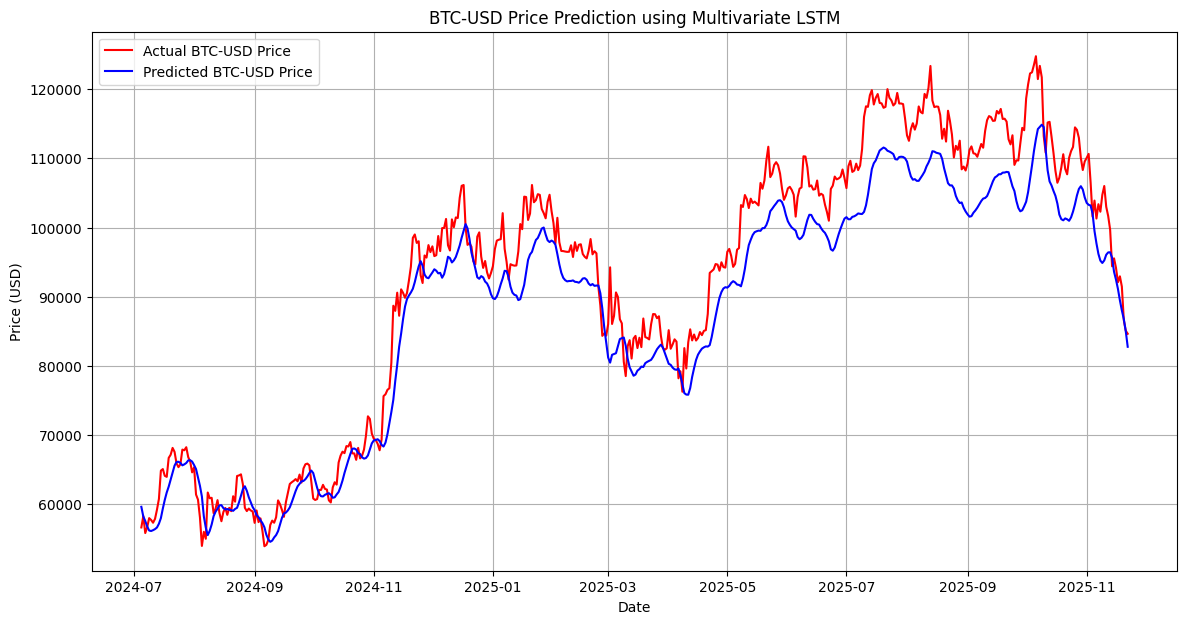

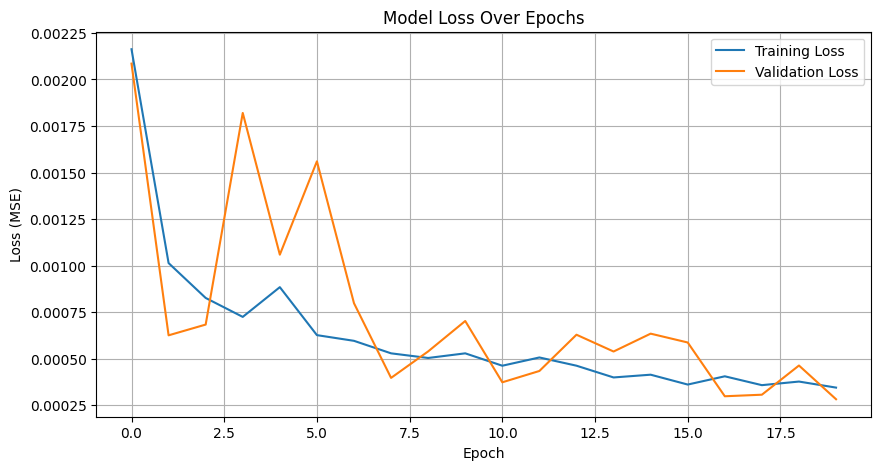

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- 1. CONFIGURATION AND DATA ACQUISITION ---
# Define parameters for the project
TICKER = 'BTC-USD'
START_DATE = '2018-01-01'
END_DATE = pd.to_datetime('today').strftime('%Y-%m-%d')
LOOK_BACK = 60 # Number of previous days/timesteps used to predict the next day
TEST_SIZE_RATIO = 0.2 # 20% of data for testing

print(f"Fetching data for {TICKER} from {START_DATE} to {END_DATE}...")

# Fetch historical data using yfinance
try:
    data = yf.download(TICKER, start=START_DATE, end=END_DATE)
    if data.empty:
        raise ValueError("No data returned from yfinance. Check ticker or date range.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Create mock data if fetching fails to ensure the code structure runs
    dates = pd.date_range(START_DATE, periods=1000, freq='D')
    data = pd.DataFrame({
        'Open': np.random.rand(1000) * 10000,
        'High': np.random.rand(1000) * 10000 + 100,
        'Low': np.random.rand(1000) * 10000 - 100,
        'Close': np.random.rand(1000) * 10000,
        'Volume': np.random.randint(10000, 100000, 1000)
    }, index=dates)
    print("Using generated mock data for demonstration.")

# We will use 'Close', 'Volume', 'High', and 'Low' as input features (multivariate)
features = ['Close', 'Volume', 'High', 'Low']
df = data[features].copy()

# --- 2. PREPROCESSING AND FEATURE ENGINEERING ---

# 2.1 Handling Missing Data
# Fill any NaNs, though daily crypto data from yfinance is usually clean.
df.fillna(method='ffill', inplace=True)

# 2.2 Feature Engineering: Log Returns (for stationarity/volatility features)
# Log returns are often more stationary than raw prices, making them a useful feature
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

# 2.3 Feature Engineering: Technical Indicators (Simple Moving Averages - SMA)
# Simple Moving Averages are common momentum indicators
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Drop the first 50 rows due to NaN values created by the rolling features (SMA_50)
df.dropna(inplace=True)

# FIX: Flatten MultiIndex columns if present (common issue with yfinance/pandas)
# This ensures column names are simple strings like 'Close' instead of tuples like ('Close', 'BTC-USD')
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)

# Update the feature list to include new engineered features
all_features = df.columns.tolist()
print(f"\nTotal features used: {all_features}")
print(f"Dataset shape after cleaning: {df.shape}")

# --- 3. SCALING AND DATA SPLIT ---

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the entire feature set
scaled_data = scaler.fit_transform(df)

# Determine split index (time-based split)
test_size = int(len(scaled_data) * TEST_SIZE_RATIO)
train_data = scaled_data[:-test_size]
test_data = scaled_data[-test_size:]

# We need a separate scaler for the 'Close' price to inverse transform predictions
# Since 'Close' is the first column in 'df', it corresponds to the first column in 'scaled_data'
close_price_scaler = MinMaxScaler(feature_range=(0, 1))
close_price_scaler.fit(df['Close'].values.reshape(-1, 1)) # Fit only on the Close price column

# --- 4. SEQUENCE CREATION FUNCTION ---

def create_sequences(data, look_back):
    """
    Creates sequences (X) and targets (Y) for LSTM.
    X: sequences of 'look_back' time steps, using all features.
    Y: the target variable (Close price) at the next time step (t+1).
    """
    X, Y = [], []
    # Find the index of the 'Close' price column in the feature list
    # This now correctly searches for 'Close' after the columns have been flattened
    close_idx = all_features.index('Close')

    for i in range(look_back, len(data)):
        # X is the window of the previous 'look_back' time steps (multivariate)
        X.append(data[i-look_back:i, :])
        # Y is the 'Close' price (index 0) at the current time step 'i' (univariate prediction)
        Y.append(data[i, close_idx])
    return np.array(X), np.array(Y)

# Apply the sequence creation to the train and test data
X_train, y_train = create_sequences(train_data, LOOK_BACK)
X_test, y_test = create_sequences(test_data, LOOK_BACK)

# Print shapes to verify the structure
print(f"X_train shape: {X_train.shape} (Samples, Timesteps, Features)")
print(f"y_train shape: {y_train.shape} (Samples, 1)")

# --- 5. MODEL BUILDING (LSTM Architecture) ---
#

model = Sequential()
# Input shape: (LOOK_BACK, num_features)
# return_sequences=True ensures the output of this layer is a sequence, suitable for the next LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(LOOK_BACK, X_train.shape[2])))
model.add(Dropout(0.2)) # Prevents overfitting

# Second LSTM layer. return_sequences=False because it's the last recurrent layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer: Dense layer predicting the single target value (Close price)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model structure
model.summary()

# --- 6. TRAINING ---
print("\nStarting model training...")

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,          # Number of passes over the training data
    batch_size=32,      # Number of samples per gradient update
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1
)

# --- 7. EVALUATION AND PREDICTION ---
print("\nEvaluating model on test data...")

# Generate predictions on the test set
predicted_scaled = model.predict(X_test)

# Inverse transform the scaled predictions to original dollar values
predictions = close_price_scaler.inverse_transform(predicted_scaled)

# Inverse transform the actual values for comparison
actual_prices_scaled = y_test.reshape(-1, 1)
actual_prices = close_price_scaler.inverse_transform(actual_prices_scaled)

# Calculate Evaluation Metrics
rmse = np.sqrt(mean_squared_error(actual_prices, predictions))
mae = mean_absolute_error(actual_prices, predictions)

print("-" * 50)
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print("-" * 50)


# --- 8. VISUALIZATION ---

# Create a clean index for the test set plot
# Start plotting from the first predicted index in the original dataset
df_test_full = df.tail(test_size)
test_dates = df_test_full.index[LOOK_BACK:]

# Create a DataFrame for plotting results
plot_df = pd.DataFrame({
    'Actual Price': actual_prices.flatten(),
    'Predicted Price': predictions.flatten()
}, index=test_dates)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(plot_df['Actual Price'], color='red', label=f'Actual {TICKER} Price')
plt.plot(plot_df['Predicted Price'], color='blue', label=f'Predicted {TICKER} Price')
plt.title(f'{TICKER} Price Prediction using Multivariate LSTM')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the loss history
plt.figure(figsize=(10, 5))
plot_loss = pd.DataFrame(history.history)
plt.plot(plot_loss['loss'], label='Training Loss')
plt.plot(plot_loss['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# --- END OF CODE ---